# Simple Linear Regression
# Objective
<ul>
    <li>How  to implement simple Linear Regression to
    predict the apparent temperature given the humidity</li>
    <li>Use scikit-learn to implement simple Linear Regression </li>
    <li>Create a model, train,test and use the model</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv file of data
data = pd.read_csv("weatherHistory.csv")
#take a look at the data
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# summerize data
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [14]:
# let's select some feature from data 
cdf = data[['Apparent Temperature (C)','Humidity','Wind Speed (km/h)']]
cdf.head(10)

,Apparent Temperature (C),Humidity,Wind Speed (km/h)
0,7.388889,0.89,14.1197
1,7.227778,0.86,14.2646
2,9.377778,0.89,3.9284
3,5.944444,0.83,14.1036
4,6.977778,0.83,11.0446
5,7.111111,0.85,13.9587
6,5.522222,0.95,12.3648
7,6.527778,0.89,14.1519
8,10.822222,0.82,11.3183
9,13.772222,0.72,12.5258


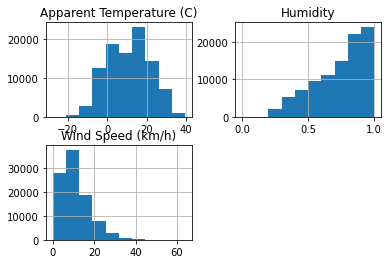

In [15]:
viz = cdf
viz.hist()
plt.show()

In [16]:
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train)
print(test)

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)
0                      7.388889      0.89            14.1197
1                      7.227778      0.86            14.2646
2                      9.377778      0.89             3.9284
3                      5.944444      0.83            14.1036
4                      6.977778      0.83            11.0446
...                         ...       ...                ...
96447                 27.850000      0.32            12.2038
96448                 26.016667      0.43            10.9963
96449                 24.583333      0.48            10.0947
96450                 22.038889      0.56             8.9838
96451                 21.522222      0.60            10.5294

[77080 rows x 3 columns]
       Apparent Temperature (C)  Humidity  Wind Speed (km/h)
5                      7.111111      0.85            13.9587
12                    17.800000      0.55            21.9443
14                    18.877778      0.47            15.375

In [7]:
train_x = train['Humidity'].values
train_y = train['Apparent Temperature (C)'].values

# calculate mean of train_x and train_y
mean_x = np.mean(train_x)
mean_y = np.mean(train_y)

# total number of values in data

m = len(train_x)

# initialize numerator and denominator
num = 0
denom= 0

for i in range(m):
    num += (train_x[i] - mean_x) * (train_y[i] - mean_y)
    denom += (train_x[i] - mean_x) ** 2
    

b1 = num / denom # coffient 
b0 = mean_y - (mean_x * b1) # intercept 

# take a look at the value of coffient and intercept
print(b1, b0)
print(b0 + (b1*0.67))

-33.08277576248696 35.16429865419707
12.998838893330802


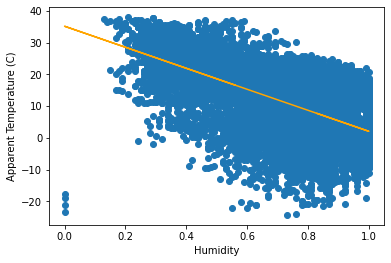

In [8]:
test_x = test['Humidity'].values
plt.scatter(test['Humidity'], test['Apparent Temperature (C)'])
plt.plot(test_x, b1*test_x + b0, "orange")
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C)")
plt.show()

In [9]:
# let's calculate the accuracy
test_x = test['Humidity'].values
test_y = test['Apparent Temperature (C)'].values

s_t = 0
s_r = 0

mae = 0
tm = len(test_x)
error = 0

for i in range(len(test_x)):
    y_pred = b0 + b1 * test_x[i]
    s_t += (test_y[i] - mean_y) ** 2
    s_r += (test_y[i] - y_pred) ** 2
    
    
mae = 1- (s_r/s_t)
print("R2-Score %.2f"%mae)

R2-Score 0.35


In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Humidity']])
train_y = np.asanyarray(train[['Apparent Temperature (C)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-33.08277576]]
Intercept:  [35.16429865]


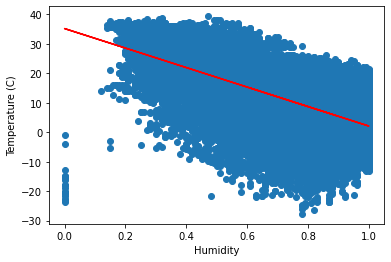

In [11]:
plt.scatter(train['Humidity'], train['Apparent Temperature (C)'])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'red')
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
plt.show()

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Humidity']])
test_y = np.asanyarray(test[['Apparent Temperature (C)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7.00
Residual sum of squares (MSE): 73.58
R2-score: 0.35
